In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# Подгрузим данные об объектах недвижимости в Калифорнии

In [2]:
data = fetch_california_housing(as_frame=True)

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Проведем первичный анализ

## Проверим данные на наличие пропусков

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


В данных нет пропусков

# Построим модель линейной регрессии

In [6]:
# выделение таргета из датасета
df_data = df.drop(columns=['MedHouseVal'])
df_target = df['MedHouseVal']

# разбиение на train, test
X_train, X_test, Y_train, Y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)

# Обучение модели на обучающей выборке
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Оценим качество модели линейной регрессии

In [7]:
models_scores = dict()

In [8]:
linear_regression_score = model.score(X_test, Y_test)
models_scores['linear_regression_score'] = linear_regression_score
print(f'{linear_regression_score=}')

linear_regression_score=0.5943232652466193


# Обучим модель DecisionTreeRegressor

In [9]:
dtr = DecisionTreeRegressor(random_state=1234)

In [10]:
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=1234)

In [11]:
decision_tree_score_before = dtr.score(X_test, Y_test)
models_scores['decision_tree_score_before'] = decision_tree_score_before
print(f'{decision_tree_score_before=}')

decision_tree_score_before=0.5855339395994061


## Визуализируем часть дерева решений

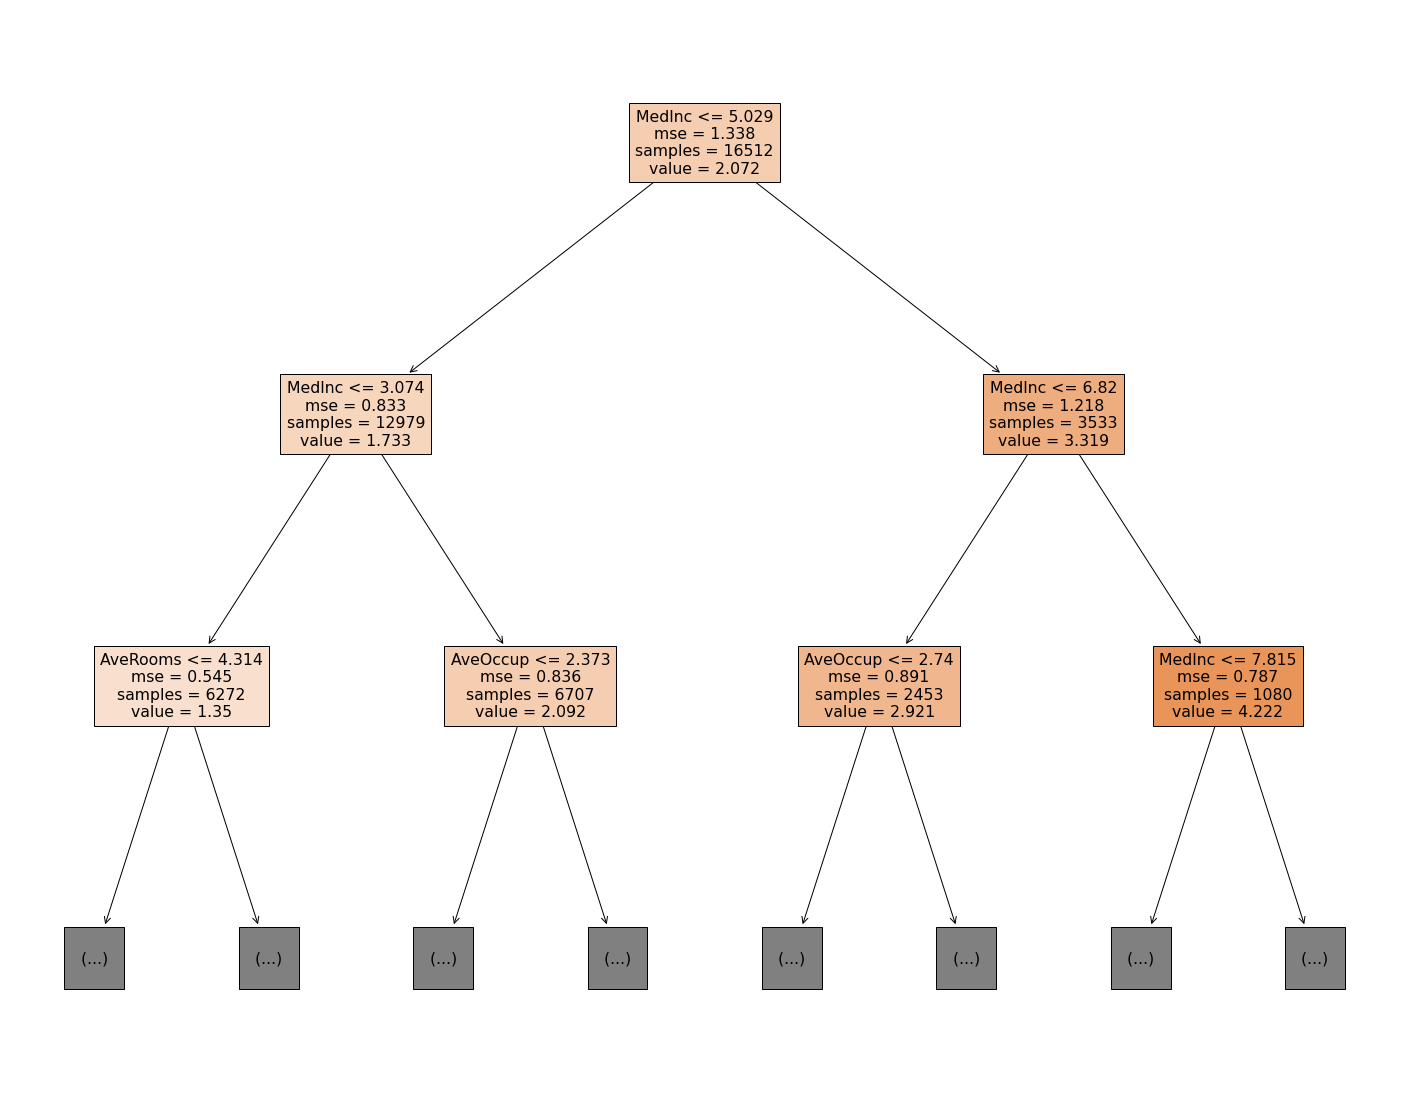

In [12]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(dtr, 
    feature_names=data.feature_names,  
    class_names=data.target_names,
    filled=True,
    max_depth=2,
)
plt.show()

При визуализации большей глубины max_depth > 3 теряется читабельность

# Оптимизируем параметр min_samples_leaf

In [13]:
leaf_scores = []
min_samples_leaf_count = 40
min_samples_leafs = range(1, min_samples_leaf_count + 1)
for min_samples_leaf in min_samples_leafs:
    dtr = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=1234)
    dtr.fit(X_train, Y_train)
    score = dtr.score(X_test, Y_test)
    leaf_scores.append(score)

In [14]:
max_score = max(leaf_scores)
optimal_min_samples_leaf = leaf_scores.index(max_score) + 1

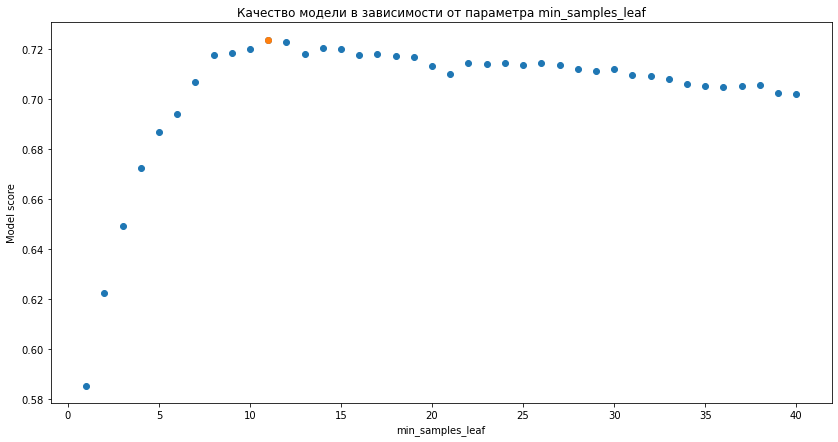

In [15]:
fig = plt.figure(figsize=(14, 7))
plt.title('Качество модели в зависимости от параметра min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Model score')
plt.scatter(x=min_samples_leafs, y=leaf_scores)
plt.scatter(x=optimal_min_samples_leaf, y=max_score)
plt.show()

In [16]:
print(f'На графике видно, что наилучшее качество модели ({max_score:.3f}) достигается при min_samples_leaf={optimal_min_samples_leaf}')

На графике видно, что наилучшее качество модели (0.724) достигается при min_samples_leaf=11


# Оптимизируем глубину дерева (max_depth)

In [17]:
depths_count = 40
depths_scores = []
depths = range(1, depths_count + 1)
for max_depth in depths:
    dtr = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=11, random_state=1234)
    dtr.fit(X_train, Y_train)
    score = dtr.score(X_test, Y_test)
    depths_scores.append(score)

In [18]:
max_score = max(depths_scores)
optimal_max_depth = depths_scores.index(max_score) + 1

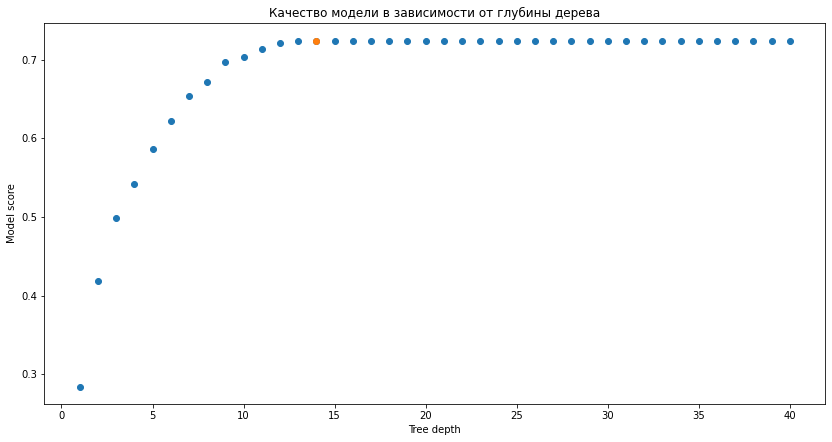

In [19]:
fig = plt.figure(figsize=(14, 7))
plt.title('Качество модели в зависимости от глубины дерева')
plt.xlabel('Tree depth')
plt.ylabel('Model score')
plt.scatter(x=depths, y=depths_scores)
plt.scatter(x=optimal_max_depth, y=max_score)
plt.show()

In [20]:
print(f'На графике видно, что наилучшее качество модели {max_score:.3f} достигается при глубине дерева: {optimal_max_depth}')

На графике видно, что наилучшее качество модели 0.724 достигается при глубине дерева: 14


In [21]:
print(f'Итоговые оптимальные параметры: {optimal_max_depth=},  {optimal_min_samples_leaf=}')

Итоговые оптимальные параметры: optimal_max_depth=14,  optimal_min_samples_leaf=11


# Обучим модель DecisionTreeRegressor на оптимизированных параметрах

In [22]:
dtr = DecisionTreeRegressor(max_depth=optimal_max_depth, min_samples_leaf=optimal_min_samples_leaf, random_state=1234)
dtr.fit(X_train, Y_train)
decision_tree_score_after = dtr.score(X_test, Y_test)
models_scores['decision_tree_score_after'] = decision_tree_score_after
print(f'{decision_tree_score_after=}')

decision_tree_score_after=0.7244225530441712


In [23]:
models_scores

{'linear_regression_score': 0.5943232652466193,
 'decision_tree_score_before': 0.5855339395994061,
 'decision_tree_score_after': 0.7244225530441712}

Видно, что после подбора оптимальных параметров качество модели `DecisionTreeRegressor` значительно увеличилось

# Выводы

При стандартных параметрах `LinearRegression` и `DecisionTreeRegressor` показали примерно одинаковое качество модели: 0.594 и 0.585 соответственно. Однако после подбора оптимальных параметров `max_depth`, `min_samples_leaf` качество модели `DecisionTreeRegressor` выросло с 0.585 до 0.724

При выборе: отдать ли предпочтение модели `DecisionTreeRegressor` или использовать другую модель нужно опираться на многие параметры. 

Например, нужно учитывать:
* количество данных и доступные вычислительные мощности - если данных много, то деревья могут ускорить вычисления значительно, поскольку правила простые
* требуется ли интерпретировать модель - деревья могут легко объяснить, например аудиту, как и на каких правилах работает модел, в отличие от других моделей - "черных ящиков"

Также стоит учитывать, что деревьев есть существенные недостатки:
* склонность к переобучению
* неустойчивость после переобучения - если данные кардинально меняются, то качество модели может сильно ухудшиться
* деревья решений хорошо отслеживает линейные зависимости, которые парралельны осям координат, но плохо отслеживает другие зависимости

В основном модели с использованием деревьев хорошо работают совместно с другими моделями, в ансамблях. Так, дерево решний может показать свои сильные стороны. Также деревья решений могут показать значимость признака во входных данных.